# Feature engineering

In [53]:
# import 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [54]:
bids = pd.read_csv('Data/bids.csv')
bidder = pd.read_csv('Data/train.csv')

In [55]:
bidder.head(5)
bidder.shape

(2013, 4)

### train and test set

In [56]:
X_bidder = bidder.drop(['outcome'],axis=1)
y_bidder = bidder['outcome']
X_train, X_test, y_train, y_test = train_test_split(X_bidder, y_bidder, random_state=42, stratify=y_bidder)

In [57]:
df_train = pd.merge(bids, pd.concat([X_train, y_train], axis=1), on='bidder_id', how='inner')
df_test = pd.merge(bids, pd.concat([X_test, y_test], axis=1), on='bidder_id', how='inner')

In [58]:
print(df_train.shape, df_test.shape)

(2356675, 12) (714549, 12)


Encoding
- pd.concat() unisce le colonne bidder_id di df_train e df_test.
- .unique() restituisce una lista di valori univoci di bidder_id presenti in entrambi i dataset, eliminando duplicati.
- enumerate(unique_bidders) associa un indice numerico (da 0 in poi) a ciascun valore unico di bidder_id.
- Successivamente viene creata la nuova colonna 'encoded_bidder_id' e viene riempita con i valori corrispondenti nella mappa

In [59]:
unique_bidders = pd.concat([df_train['bidder_id'], df_test['bidder_id']]).unique()
bidder_mapping = {bidder_id: idx for idx, bidder_id in enumerate(unique_bidders)}
df_train['encoded_bidder_id'] = df_train['bidder_id'].map(bidder_mapping)
df_test['encoded_bidder_id'] = df_test['bidder_id'].map(bidder_mapping)

In [60]:
df_train.drop('bidder_id',axis=1,inplace=True)
df_test.drop('bidder_id',axis=1,inplace=True)

In [61]:
df_train

,bid_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome,encoded_bidder_id
0,1,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,0
1,25,38v0a,furniture,phone4,9759243315789473,bd,147.64.206.30,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,0
2,39,aeqok,furniture,phone35,9759243368421052,in,75.11.239.20,i92xwb95qdo901j,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,0
3,42,jkyzt,furniture,phone38,9759243368421052,in,215.203.78.242,s4hrzaqd5vbq2he,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,0
4,68,h2xrf,furniture,phone57,9759243526315789,in,134.198.237.242,1euklxshlldto4z,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2356670,7614200,jqx39,jewelry,phone76,9709028052631578,id,121.17.182.102,zevtz58oim9r7i5,a3d2de7675556553a5f08e4c88d2c228wissi,502100bcbbe650810a27b0e70d96372ere7rp,0.0,1483
2356671,7617228,jqx39,jewelry,phone65,9709041947368421,cn,90.168.76.210,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228wissi,502100bcbbe650810a27b0e70d96372ere7rp,0.0,1483
2356672,7639758,cy43h,sporting goods,phone142,9709146315789473,in,108.54.134.235,xe4uylmhtrsvss1,a3d2de7675556553a5f08e4c88d2c2284grjh,e1ef795abd4f178f753542cbbf54ce89jcfxk,0.0,1484
2356673,7651414,y3n7r,mobile,phone21,9709200631578947,in,95.158.193.99,qctqqhoxoicvck1,4c94a221dc03977b5bf3f2035379797cn4n58,65d747de6c1cca49af4c0c27a5b7e8c7tti5y,0.0,1485


In [62]:
df_test

,bid_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome,encoded_bidder_id
0,44,958x1,mobile,phone42,9759243368421052,in,254.254.37.252,onbgo5s1m97rxur,ca482605ca991c5febd0c4a9fd28b6814l275,c1798623ef4c119237f11b9e6622883bsa47l,0.0,1487
1,276,38v0a,mobile,phone38,9759244631578947,in,232.98.19.153,dy77rf6vkosrlhn,ca482605ca991c5febd0c4a9fd28b6814l275,c1798623ef4c119237f11b9e6622883bsa47l,0.0,1487
2,470,sz8v4,mobile,phone47,9759245684210526,in,210.30.25.7,9ty3boywvns4a3p,ca482605ca991c5febd0c4a9fd28b6814l275,c1798623ef4c119237f11b9e6622883bsa47l,0.0,1487
3,693,19fz7,mobile,phone3,9759246947368421,in,166.108.111.41,ezydp6vg4kwxi0m,ca482605ca991c5febd0c4a9fd28b6814l275,c1798623ef4c119237f11b9e6622883bsa47l,0.0,1487
4,804,19fz7,mobile,phone3,9759247631578947,in,166.108.111.41,ezydp6vg4kwxi0m,ca482605ca991c5febd0c4a9fd28b6814l275,c1798623ef4c119237f11b9e6622883bsa47l,0.0,1487
...,...,...,...,...,...,...,...,...,...,...,...,...
714544,7619267,vp7uk,home goods,phone22,9709051315789473,au,79.33.249.99,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c2283b82i,60514906c638e30bf583fe0c781bf506j69e9,1.0,1982
714545,7619426,596fl,home goods,phone22,9709052052631578,au,79.33.249.99,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c2283b82i,60514906c638e30bf583fe0c781bf506j69e9,1.0,1982
714546,7620459,596fl,home goods,phone22,9709057157894736,au,79.33.249.99,rzfurpu12xsox3o,a3d2de7675556553a5f08e4c88d2c2283b82i,60514906c638e30bf583fe0c781bf506j69e9,1.0,1982
714547,7620584,obu1s,home goods,phone22,9709057736842105,au,79.33.249.99,rzfurpu12xsox3o,a3d2de7675556553a5f08e4c88d2c2283b82i,60514906c638e30bf583fe0c781bf506j69e9,1.0,1982


### Extract auction_count and device_count


In [63]:
def count_for_bidder(bidder_id, feature, df):
	return df[df['encoded_bidder_id'] == bidder_id][feature].nunique()

bidders_train = pd.DataFrame(df_train['encoded_bidder_id'].unique(), columns=['encoded_bidder_id'])
# Estrae i valori univoci dalla colonna encoded_bidder_id in df_train.
# Li converte in un nuovo DataFrame chiamato bidders_train, che ha una singola colonna encoded_bidder_id.

bidders_test = pd.DataFrame(df_test['encoded_bidder_id'].unique(), columns=['encoded_bidder_id'])

features = ['auction', 'device', 'bid_id', 'ip', 'url']

for feature in features:
	bidders_train[feature + '_count'] = bidders_train['encoded_bidder_id'].apply(lambda bidder: count_for_bidder(bidder, feature, df_train))
	bidders_test[feature + '_count'] = bidders_test['encoded_bidder_id'].apply(lambda bidder: count_for_bidder(bidder, feature, df_test))

### Add the average number of bids a user placed per referring URL

In [64]:
# Label Encoding for url, bid_id, bidder_id 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_train["url"] = encoder.fit_transform(df_train['url'])
df_test["url"] = encoder.fit_transform(df_test['url'])

# Group by bidder_id and url and count number of bids for every group
bids_per_url_train = df_train.groupby(['encoded_bidder_id', 'url'])['bid_id'].count().reset_index(name='bid_count')
bids_per_url_test = df_test.groupby(['encoded_bidder_id', 'url'])['bid_id'].count().reset_index(name='bid_count')

# Calculate the mean
average_bids_per_user_train = bids_per_url_train.groupby('encoded_bidder_id')['bid_count'].mean().reset_index(name='avg_bids_per_url')
average_bids_per_user_test = bids_per_url_test.groupby('encoded_bidder_id')['bid_count'].mean().reset_index(name='avg_bids_per_url')


In [65]:
average_bids_per_user_test

,encoded_bidder_id,avg_bids_per_url
0,1487,2.243692
1,1488,1.378698
2,1489,1.800000
3,1490,98.000000
4,1491,5.500000
...,...,...
492,1979,1.000000
493,1980,1.000000
494,1981,1.000000
495,1982,91.500000


### Add the mean of the per-auction URL entropy
- Higher values of entropy suggest that the bidder's bidding behavior is spread across different auctions/URLs with a more uniform distribution.
- Lower values of entropy suggest that the bidder's activity is concentrated in specific auctions or URLs.

In [66]:
# Label Encoding for auction
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_train["auction"] = encoder.fit_transform(df_train['auction'])
df_test["auction"] = encoder.fit_transform(df_test['auction'])

# Group by bidder_id and url and count number of url for every group
bids_per_auction_url_train = df_train.groupby(['encoded_bidder_id', 'auction'])['url'].count().reset_index(name='url_per_auction_count')
bids_per_auction_url_test = df_test.groupby(['encoded_bidder_id', 'auction'])['url'].count().reset_index(name='url_per_auction_count')

def calculate_entropy(values):
	total = sum(values)
	probabilities = [count / total for count in values]
	return -sum(p * np.log2(p) for p in probabilities if p > 0)

# Calculate entropy for each bidder per auction
bids_per_auction_url_entropy_train = (
	bids_per_auction_url_train.groupby(['encoded_bidder_id'])['url_per_auction_count']
	.apply(calculate_entropy)
	.reset_index(name='url_entropy_per_auction')
)

bids_per_auction_url_entropy_test = (
	bids_per_auction_url_test.groupby(['encoded_bidder_id'])['url_per_auction_count']
	.apply(calculate_entropy)
	.reset_index(name='url_entropy_per_auction')
)

bids_per_auction_url_entropy_train

,encoded_bidder_id,url_entropy_per_auction
0,0,5.696760
1,1,6.861685
2,2,7.233957
3,3,5.776505
4,4,7.028601
...,...,...
1482,1482,-0.000000
1483,1483,-0.000000
1484,1484,-0.000000
1485,1485,-0.000000


### Fraction of IPs used by a bidder which were also used by a bot

In [67]:
# Label Encoding for IPs, outcome
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_train["ip"] = encoder.fit_transform(df_train['ip'])
df_test["ip"] = encoder.fit_transform(df_test['ip'])

df_train["outcome"] = df_train['outcome'].astype(int)
df_test["outcome"] = df_test['outcome'].astype(int)

bot_ips_train = set(df_train.loc[df_train['outcome'] == 1, 'ip'])
bidder_ips_train = df_train.groupby('encoded_bidder_id')['ip'].apply(set) # Group by encoded_bidder_id
bot_ips_test = set(df_test.loc[df_test['outcome'] == 1, 'ip'])
bidder_ips_test = df_test.groupby('encoded_bidder_id')['ip'].apply(set) # Group by encoded_bidder_id


def compute_fraction_overlap(ips, bot_ips):
	if not ips:  # Handle cases where a bidder has no IPs
		return 0.0
	return len(ips & bot_ips) / len(ips)

ips_fraction_bidder_bot_train = bidder_ips_train.apply(lambda x: compute_fraction_overlap(x, bot_ips_train)).reset_index(name='fraction_bidder_bot_ips')
ips_fraction_bidder_bot_test = bidder_ips_test.apply(lambda x: compute_fraction_overlap(x, bot_ips_test)).reset_index(name='fraction_bidder_bot_ips')

ips_fraction_bidder_bot_train

,encoded_bidder_id,fraction_bidder_bot_ips
0,0,0.162563
1,1,0.085985
2,2,0.047730
3,3,0.058717
4,4,0.089695
...,...,...
1482,1482,1.000000
1483,1483,0.000000
1484,1484,0.000000
1485,1485,0.000000


### Join new features extracted with bidder_train and bidder_test

In [68]:
from functools import reduce

# List of DataFrames to merge
dfs_to_merge_train = [average_bids_per_user_train, ips_fraction_bidder_bot_train, bids_per_auction_url_entropy_train]
dfs_to_merge_test = [average_bids_per_user_test, ips_fraction_bidder_bot_test, bids_per_auction_url_entropy_test]

# Merge all DataFrames on a common column
for df_to_merge_train, df_to_merge_test in zip(dfs_to_merge_train, dfs_to_merge_test):
	bidders_train = pd.merge(bidders_train, df_to_merge_train, on='encoded_bidder_id', how='outer')
	bidders_test = pd.merge(bidders_test, df_to_merge_test, on='encoded_bidder_id', how='outer')

### Add bid_per_auction
- float feature
- bids places by a bidder for every auction

In [69]:
bidders_train['bid_per_auction'] = bidders_train['bid_id_count']/bidders_train['auction_count']
bidders_test['bid_per_auction'] = bidders_test['bid_id_count']/bidders_test['auction_count']
# print(bidders_train["bid_per_auction"].describe())
bidders_train

,encoded_bidder_id,auction_count,device_count,bid_id_count,ip_count,url_count,avg_bids_per_url,fraction_bidder_bot_ips,url_entropy_per_auction,bid_per_auction
0,0,594,1029,19988,10316,4527,4.415286,0.162563,5.696760,33.649832
1,1,787,403,30062,20492,295,101.905085,0.085985,6.861685,38.198221
2,2,748,2020,192565,53405,36518,5.273153,0.047730,7.233957,257.439840
3,3,162,367,9108,6046,1886,4.829268,0.058717,5.776505,56.222222
4,4,963,1610,84319,27560,13416,6.284958,0.089695,7.028601,87.558671
...,...,...,...,...,...,...,...,...,...,...
1482,1482,1,1,1,1,1,1.000000,1.000000,-0.000000,1.000000
1483,1483,1,2,2,2,2,1.000000,0.000000,-0.000000,2.000000
1484,1484,1,1,1,1,1,1.000000,0.000000,-0.000000,1.000000
1485,1485,1,1,1,1,1,1.000000,0.000000,-0.000000,1.000000


### Bidders_trains:
un nuovo dataframe con chiave "encoded_bidder_id", per cui ha solo 1487 samples

In [70]:
bidders_train.shape

(1487, 10)

In [71]:
bidders_test.shape

(497, 10)

### Training and test with new features

### First:
- create a new dataframe to maintain the originale and its features untouched
- merge the new founded features in the df_train and df_test
- drop the old features
- encode 'merchandise'

In [72]:
# Join between bidders_train and df_train
df_train_with_new_features = pd.merge(bidders_train, df_train, on='encoded_bidder_id', how='inner')
df_train_with_new_features.drop(["encoded_bidder_id", "bid_id","auction", "device", "address", "payment_account", "time", "country", "ip", "url"], axis=1, inplace=True)

df_test_with_new_features = pd.merge(bidders_test, df_test, on='encoded_bidder_id', how='inner')
df_test_with_new_features.drop(["encoded_bidder_id", "bid_id","auction", "device", "address", "payment_account", "time", "country", "ip", "url"], axis=1, inplace=True)

# Encoding 'merchandise'
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_train_with_new_features["merchandise"] = encoder.fit_transform(df_train_with_new_features['merchandise'])
df_test_with_new_features["merchandise"] = encoder.fit_transform(df_test_with_new_features['merchandise'])

# Convert 'outcome' in type int
df_train_with_new_features['outcome'] = df_train_with_new_features['outcome'].astype(int)
df_test_with_new_features['outcome'] = df_test_with_new_features['outcome'].astype(int)
df_train_with_new_features.head(5)


,auction_count,device_count,bid_id_count,ip_count,url_count,avg_bids_per_url,fraction_bidder_bot_ips,url_entropy_per_auction,bid_per_auction,merchandise,outcome
0,594,1029,19988,10316,4527,4.415286,0.162563,5.69676,33.649832,4,0
1,594,1029,19988,10316,4527,4.415286,0.162563,5.69676,33.649832,4,0
2,594,1029,19988,10316,4527,4.415286,0.162563,5.69676,33.649832,4,0
3,594,1029,19988,10316,4527,4.415286,0.162563,5.69676,33.649832,4,0
4,594,1029,19988,10316,4527,4.415286,0.162563,5.69676,33.649832,4,0


### Then:
- train a Decision Tree model and see what happens

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    665084
           1       1.00      1.00      1.00     49465

    accuracy                           1.00    714549
   macro avg       1.00      1.00      1.00    714549
weighted avg       1.00      1.00      1.00    714549



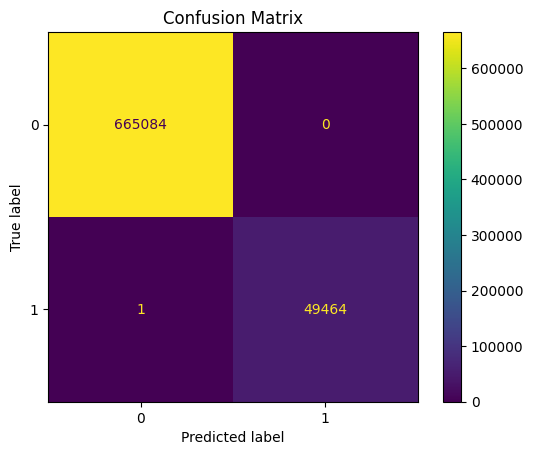

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train_new_features = df_train_with_new_features.drop(['outcome'],axis=1)
y_train_new_features = df_train_with_new_features['outcome']
X_test_new_features = df_test_with_new_features.drop(['outcome'],axis=1)
y_test_new_features = df_test_with_new_features['outcome']
# print(X_with_new_features.head(5))
# print(y_with_new_features.head(5))
# X_train_new_features, X_test_new_features, y_train_new_features, y_test_new_features = train_test_split(X_with_new_features, y_with_new_features, test_size=0.3, random_state=42, stratify=y_with_new_features)

dt_with_new_features_count = DecisionTreeClassifier()
dt_with_new_features_count.fit(X_train_new_features, y_train_new_features)
y_pred_with_new_features_count = dt_with_new_features_count.predict(X_test_new_features)

cr_new_features = classification_report(y_test_new_features, y_pred_with_new_features_count)
print("Classification Report:")
print(cr_new_features)

from sklearn.metrics import ConfusionMatrixDisplay
cm_dt_with_new_features = ConfusionMatrixDisplay.from_estimator(dt_with_new_features_count, X_test_new_features, y_test_new_features)

import os
from datetime import datetime
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_dir = f"Outputs/output_{timestamp}"
os.makedirs(output_dir, exist_ok=True)
image_path = os.path.join(output_dir, 'Confusion Matrix.png')

import matplotlib.pyplot as plt
plt.title('Confusion Matrix')
plt.savefig(image_path, dpi=300, bbox_inches='tight')

class_report_path = os.path.join(output_dir, 'Classification_report.txt')
with open(class_report_path, 'w') as f:
    f.write(cr_new_features)

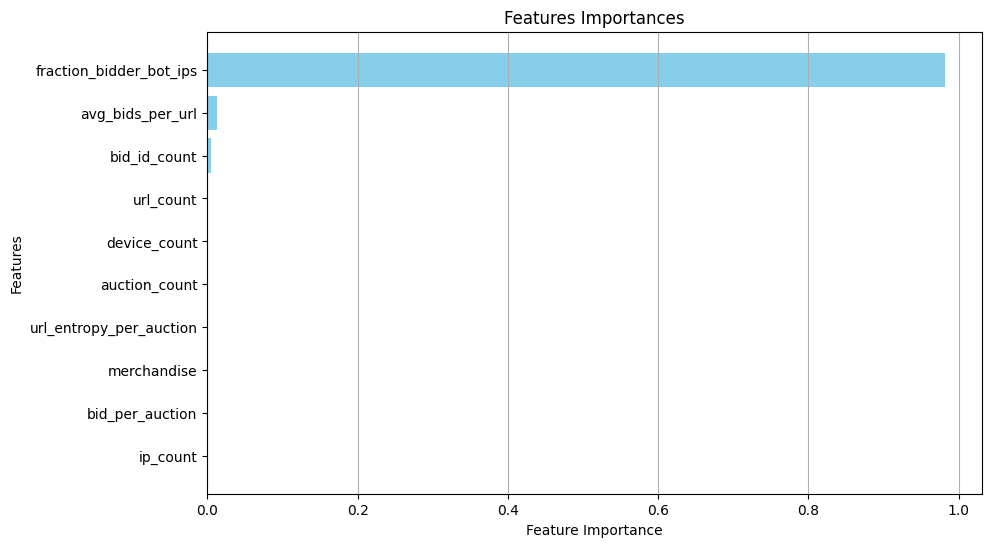

In [74]:
import numpy as np

# Ottieni le importanze delle feature
feature_importances = dt_with_new_features_count.feature_importances_

# Ordina le feature per importanza decrescente
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = X_train_new_features.columns[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances in DecisionTreeClassifier")
plt.gca().invert_yaxis()  # Inverti l'asse Y per avere la feature più importante in alto
plt.grid(axis='x')

fea_importance_path = os.path.join(output_dir, 'Feature_importances.png')
plt.title('Features Importances')
plt.savefig(fea_importance_path, dpi=300, bbox_inches='tight')

In [99]:
# from fep import FEP, load_features
# pipeline = FEP("prova.csv")
# pipeline.save_features(df_train)